In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Nivell 1

### * Connecta Python amb MySQL Workbench i carrega les dades de la teva base de dades del Sprint 4 per utilitzar-les en tots els exercicis.


In [2]:
# --- Parámetros de conexión ---
user_db = 'root'
password_db = 'Paulinha#44' # ¡Tu contraseña correcta!
host_db = '127.0.0.1'
database_name = 'creacio_base_dades'

# --- Establecemos la conexión ---
try:
    conexion = mysql.connector.connect(
        user=user_db,
        password=password_db,
        host=host_db,
        database=database_name,
        port='3306'
    )
    print("¡Conexión a MySQL establecida con éxito!")

except Exception as e:
    print(f"Error al conectar a MySQL: {e}")

¡Conexión a MySQL establecida con éxito!


## 2. Per a cada ítem, crea una visualització adequada segons les variables especificades. Interpreta els resultats segons les teves dades.

* Recorda: quan seleccionis les columnes, pensa sempre en el mètode que faràs servir i inclou les que calguin per a la funció de visualització que vulguis utilitzar.

In [3]:
# vamos a cargar todas las tablas de la base de datos en un diccionario de DataFrames de pandas

# 1. Obtener la lista de todas las tablas
print("Obteniendo lista de tablas...")
query_tablas = "SHOW TABLES;"
# El warning de SQLAlchemy es normal, lo ignoro
df_lista_tablas = pd.read_sql(query_tablas, conexion)
nombres_tablas = df_lista_tablas.iloc[:, 0].tolist()
print(f"Tablas encontradas: {nombres_tablas}")

# 2. Crear un diccionario vacío llamado 'df'
df = {}

# 3. Usar un bucle para leer cada tabla y guardarla en el diccionario
print("\n--- Iniciando carga de tablas ---")
for tabla in nombres_tablas:
    print(f"Cargando tabla: '{tabla}' ...")
    query_datos = f"SELECT * FROM {tabla};"
    
    # La clave del diccionario será el nombre de la tabla (ej. 'transactions')
    df[tabla] = pd.read_sql(query_datos, conexion)

print("¡Carga completa!")


Obteniendo lista de tablas...
Tablas encontradas: ['american_users_backup', 'companies', 'credit_card_status', 'credit_cards', 'european_users_backup', 'products', 'transactions', 'transactions_products', 'users']

--- Iniciando carga de tablas ---
Cargando tabla: 'american_users_backup' ...
Cargando tabla: 'companies' ...
Cargando tabla: 'credit_card_status' ...
Cargando tabla: 'credit_cards' ...
Cargando tabla: 'european_users_backup' ...
Cargando tabla: 'products' ...
Cargando tabla: 'transactions' ...


/var/folders/gm/4tsdgw8968133fnvjsk29ssc0000gn/T/ipykernel_6919/936502892.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_lista_tablas = pd.read_sql(query_tablas, conexion)
/var/folders/gm/4tsdgw8968133fnvjsk29ssc0000gn/T/ipykernel_6919/936502892.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df[tabla] = pd.read_sql(query_datos, conexion)


Cargando tabla: 'transactions_products' ...
Cargando tabla: 'users' ...
¡Carga completa!


In [4]:
# si nos interesa solo cargar una tabla concreta o pocas, podemos hacerlo manuelmente, por ejemplo credit_cards:

#query = "SELECT * FROM credit_cards;"  # conectamos con la tabla
#df_cards = pd.read_sql(query, conexion)

### 2.1 Una variable numèrica.

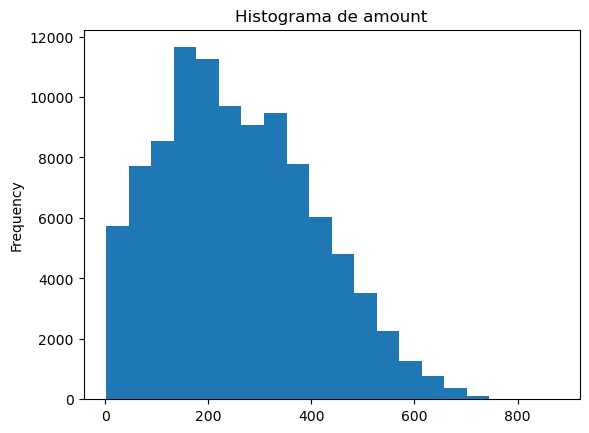

In [5]:
df['transactions']['amount'].plot.hist(bins = 20)
plt.title('Histograma de amount')
plt.show()

### 2.2 Dues variables numèriques.

In [6]:
# Paso 1: Vamos a comparar amount (transactions) con price(products), estan conectadas por
# la tabla transactions_products, Unir (Merge) las 3 tablas 

# Unimos transactions con la tabla intermedia
temp_merge = pd.merge(df['transactions'], 
                      df['transactions_products'], 
                      left_on='id', 
                      right_on='transaction_id', 
                      how='inner')

# Unimos el resultado con products
# (Pandas renombrará las columnas 'id' duplicadas automáticamente)
merged_df_1 = pd.merge(temp_merge, 
                       df['products'], 
                       left_on='product_id', 
                       right_on='id', 
                       how='inner')

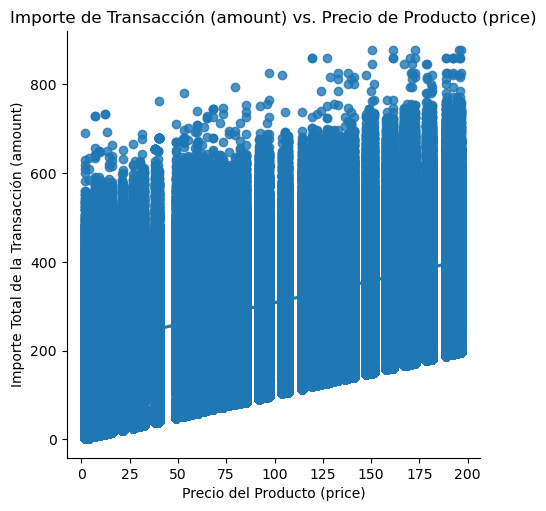

In [7]:
# Paso 2: Grafico (Scatterplot)
# en Seaborn

sns.lmplot(data=merged_df_1, x='price', y='amount')
plt.title('Importe de Transacción (amount) vs. Precio de Producto (price)')
plt.xlabel('Precio del Producto (price)')
plt.ylabel('Importe Total de la Transacción (amount)')
plt.show()

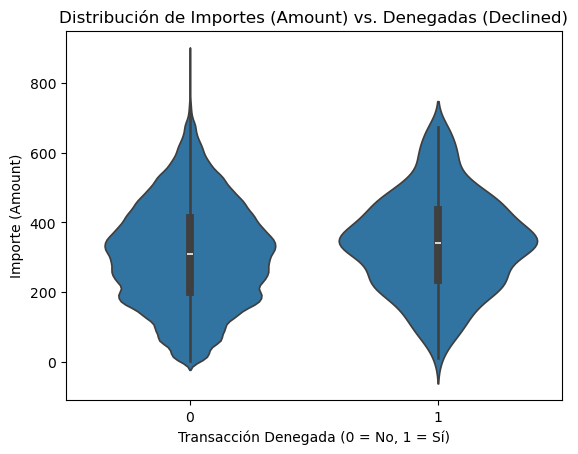

In [8]:
# estas dos variables: amount i declined(aunque no es numérica, es binaria y nos da buena información)
# las transacciones denegadas suelen tener importes más altos (400 de media) que las aceptadas (200 de media)
# Crear el violinplot
sns.violinplot(data=merged_df_1, x='declined', y='amount')

# Añadir título y mostrar el gráfico
plt.title('Distribución de Importes (Amount) vs. Denegadas (Declined)')
plt.xlabel('Transacción Denegada (0 = No, 1 = Sí)')
plt.ylabel('Importe (Amount)')
plt.show()

### 2.3 Una variable categòrica.

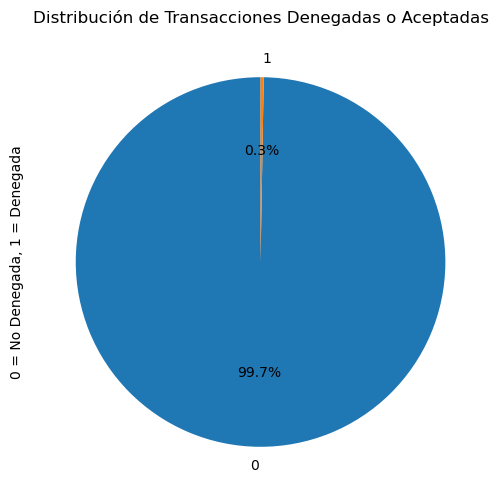

In [9]:
grafico = merged_df_1['declined'].value_counts()
grafico.plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle = 90)
plt.title('Distribución de Transacciones Denegadas o Aceptadas')
plt.ylabel('0 = No Denegada, 1 = Denegada')
plt.show()

### 2.4 Una variable categòrica i una numèrica.

In [10]:
merged_df_2 = pd.merge(df['transactions'], df['companies'], left_on='business_id', right_on='company_id', how='inner')

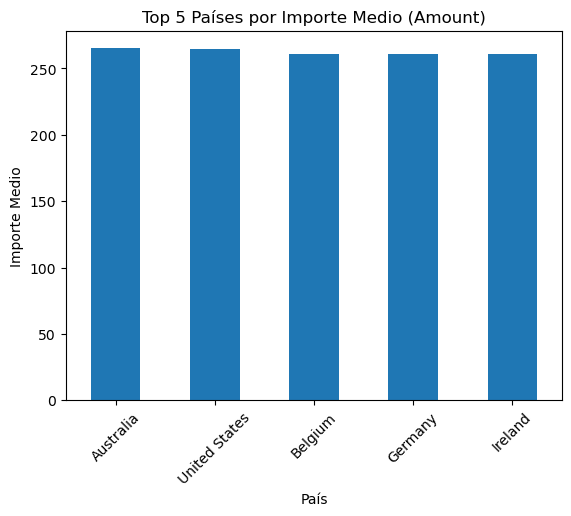

In [11]:
# 1. Calcular la media, ordenar y coger el top 5
top_5_mean = merged_df_2.groupby('country')['amount'].mean().sort_values(ascending=False).head(5)

# 2. Graficar solo ese top 5
top_5_mean.plot.bar()

# Añadir títulos
plt.title('Top 5 Países por Importe Medio (Amount)')
plt.ylabel('Importe Medio')
plt.xlabel('País')
plt.xticks(rotation=45) # Rotar las etiquetas para que se lean mejor
plt.show()

### 2.5 Dues variables categòriques.

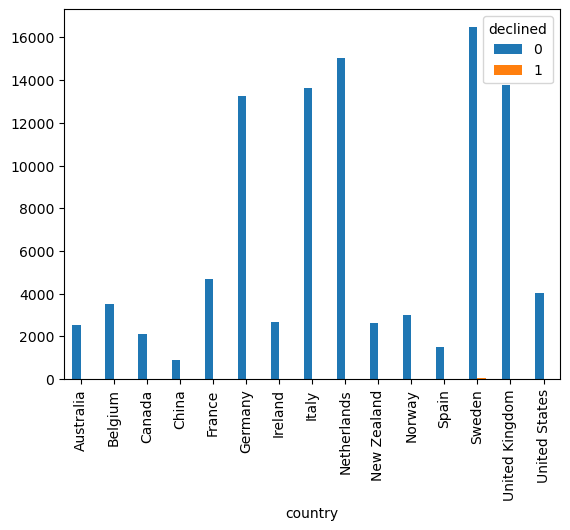

In [12]:
pd.crosstab(merged_df_2['country'], merged_df_2['declined']).plot.bar(); # si le ponemos ; al final no sale texto al principio
plt.show()

### 2.6 Tres variables combinades.

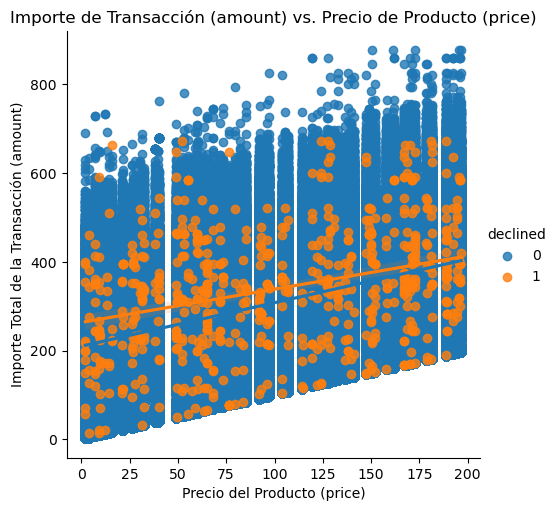

In [13]:
sns.lmplot(data=merged_df_1, x='price', y='amount', hue = 'declined')
plt.title('Importe de Transacción (amount) vs. Precio de Producto (price)')
plt.xlabel('Precio del Producto (price)')
plt.ylabel('Importe Total de la Transacción (amount)')
plt.show()

### 2.8 Crea un Pairplot

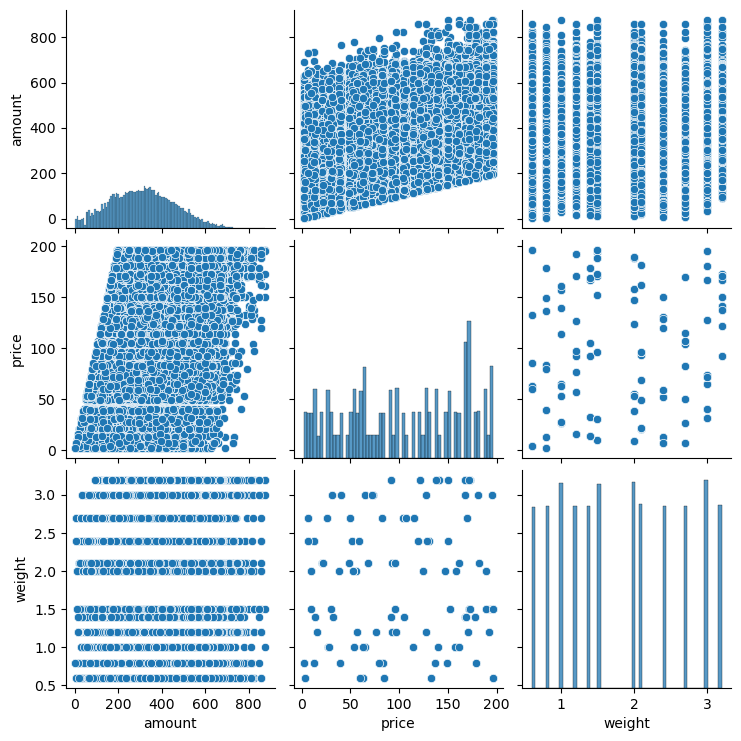

In [14]:
# 'vars' -> le decimos qué variables numéricas queremos comparar
# el resultado muestra:
# los importes de ventas  son mayoritariamente bajos.
# el precio de los productos tiene una distribución uniforme, con algun pico en procuctos de precio alto.
# las ventas y el precio no tienen ninguna correlación con el peso.
# correlación positiva entre amount y price. Las transacciones más caras incluyen productos más caros.

sns.pairplot(data=merged_df_1, 
             vars=['amount', 'price', 'weight'])
plt.show()

# Nivell 2

## 1. Representa la correlació d'algunes variables i interpreta els resultats segons les teves dades.

In [15]:
df['transactions']['timestamp'].dtype

dtype('<M8[ns]')

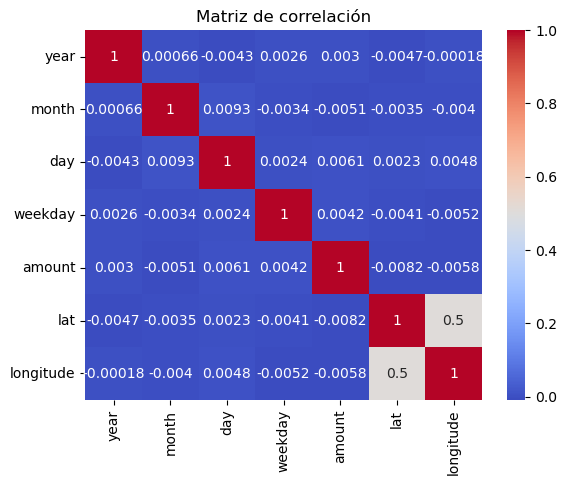

In [16]:
# Crear nuevas columnas numéricas
df['transactions']['year'] = df['transactions']['timestamp'].dt.year
df['transactions']['month'] = df['transactions']['timestamp'].dt.month
df['transactions']['day'] = df['transactions']['timestamp'].dt.day
df['transactions']['weekday'] = df['transactions']['timestamp'].dt.weekday  # 0=lunes, 6=domingo

# Matriz de correlación (ejemplo con otras numéricas)
corr = df['transactions'][['year', 'month', 'day', 'weekday', 'amount', 'lat', 'longitude']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### Interpretación de la Matriz de Correlación

El mapa de calor (heatmap) nos permite cuantificar las relaciones lineales entre las variables numéricas de nuestro conjunto de datos:

#### 1. Conclusión principal: `amount` (Importe)
La variable **`amount`** muestra una correlación casi nula (valores muy cercanos a 0) con todas las demás variables.

* **vs. `lat`/`lon` (Ubicación):** -0.041 y -0.0082.
* **vs. `year`/`month`/`day` (Fecha):** -0.003, -0.0051 y 0.0061.

**Interpretación:** Esto confirma numéricamente lo que vimos en los gráficos. **El importe de una transacción no tiene relación lineal ni con el lugar geográfico donde ocurre ni con la fecha en que se realiza.**

#### 2. Observación Geográfica: `lat` vs. `longitude`
Observamos una **correlación positiva moderada (0.5)** entre la latitud y la longitud.

**Interpretación:** Este valor no indica que existe una tendencia. Al analizarlo junto al gráfico de dispersión (el "mapa"), entendemos la causa:
* Nuestros datos se agrupan en clústeres (Europa y Norteamérica).
* El clúster de **Europa** (longitud positiva) se encuentra, en promedio, en **latitudes ligeramente más altas** que el clúster de **Norteamérica** (longitud negativa).

#### 3. Conclusión sobre las Fechas
Las variables creadas a partir del *timestamp* (`year`, `month`, `day`, `weekday`) no muestran ninguna correlación fuerte entre ellas ni con las variables geográficas, lo cual es esperado.

## 2. Implementa un Jointplot per explorar la relació entre dues variables i interpreta els resultats segons les teves dades.

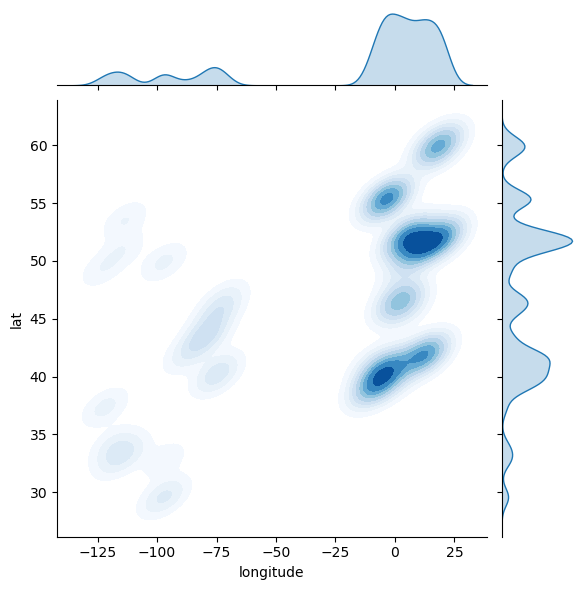

In [17]:
sns.jointplot(data=df['transactions'], x='longitude', y='lat', kind='kde', cmap='Blues', fill=True )
plt.show()

# con kind='hex' es mas claro, pero he dejado este para uso futuro, me gusta más el de tipo hex
# sns.jointplot(data=df_transactions, x='longitude', y='lat', kind='hex

### Interpretación del Jointplot (longitud vs. latitud)

Este gráfico nos muestra la **densidad** de las transacciones geográficamente:

1.  **Gráfico Central (Hexágonos):** Confirma que los datos no son aleatorios, sino que se agrupan en **clústeres geográficos** (Europa y Norteamérica). Los hexágonos más oscuros indican las zonas con mayor concentración de transacciones.
2.  **Histogramas (Superior y Derecho):** Muestran los picos de distribución. Las barras del histograma superior (longitud) son **notablemente más altas en el clúster europeo** (longitud 0-20).

**Conclusión:** Las transacciones están fuertemente concentradas en dos regiones principales, con una **densidad de transacciones visiblemente mayor en el clúster europeo** que en los de Norteamérica.

# Nivell 3

## 1. Transfereix totes les visualitzacions del Nivell 1 a Power BI utilitzant scripts de Python.
### * Recorda: quan carreguis els teus dataframes a Power BI, assegura't d’incloure una columna identificadora o una combinació de columnes que garanteixi la unicitat de cada registre. Per defecte, Power BI elimina duplicats i podries perdre informació.

In [18]:
# Exportamos las tablas principales a archivos CSV

df['transactions'].to_csv('transactions.csv', index=False)
df['users'].to_csv('users.csv', index=False)
df['companies'].to_csv('companies.csv', index=False)
df['products'].to_csv('products.csv', index=False)
df['transactions_products'].to_csv('transactions_products.csv', index=False)

merged_df_1.to_csv('merged_df_1.csv', index=False)
merged_df_2.to_csv('merged_df_2.csv', index=False)

# Cerramos la sesión

In [19]:
# Comprobamos si la variable 'conexion' existe y si está conectada
if 'conexion' in locals() and conexion.is_connected():
    conexion.close()
    print("Conexión a MySQL cerrada con éxito.")
else:
    print("La conexión ya estaba cerrada.")

Conexión a MySQL cerrada con éxito.
